[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Arahmanizadeh/gsproginpython/blob/main/Course1_Lesson05.ipynb)

# 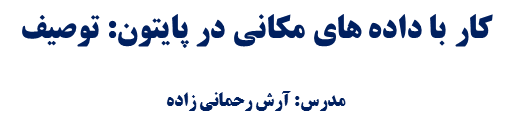

## Spatial Data

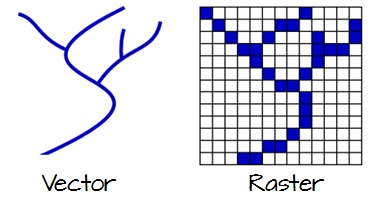

### Vector Data
Vector features can be decomposed into three different geometric primitives: points, polylines and polygons.


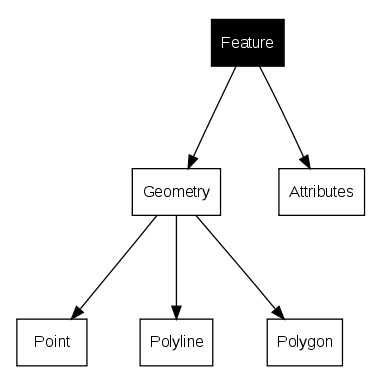

### Raster Data
A raster data model uses an array of cells, or pixels, to represent real-world objects.

### Attributes
Attributes for a vector feature are stored in a table.

## Pandas
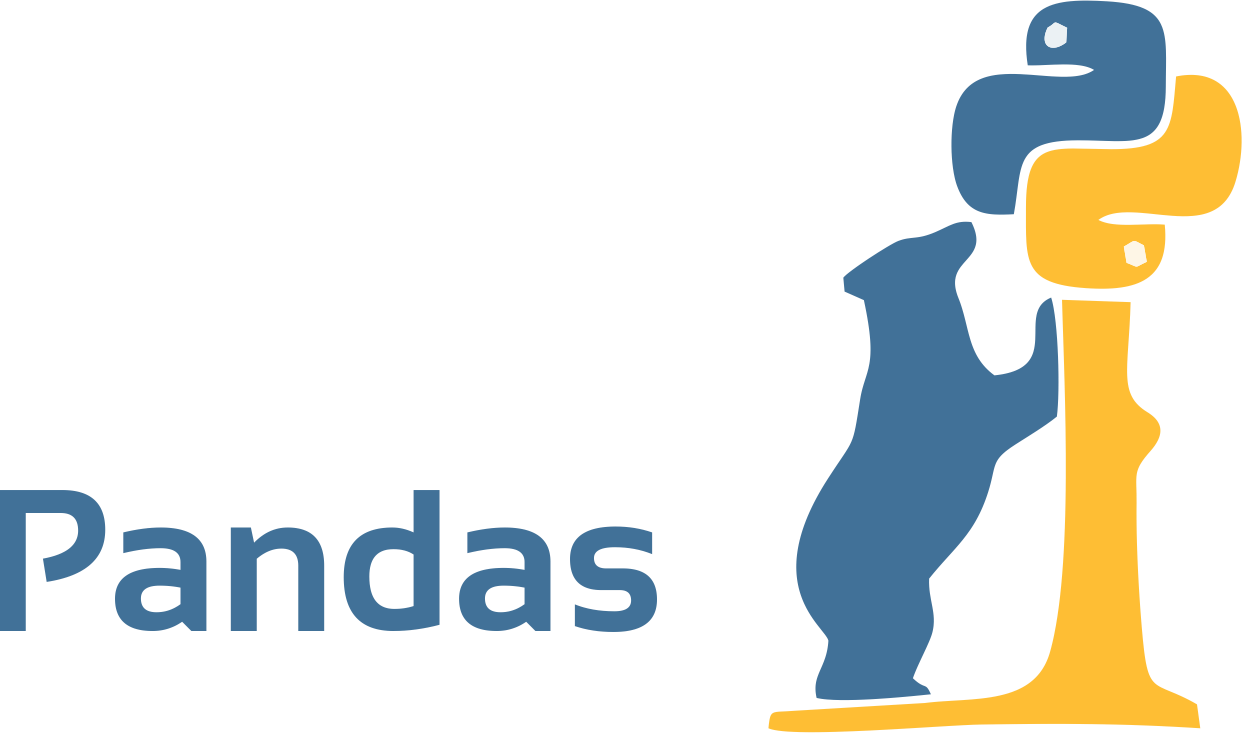

pandas is a modern, powerful and feature-rich library that is designed for doing data analysis in Python.

In [ ]:
# !wget https://github.com/datasets/world-cities/raw/master/data/world-cities.csv
!wget https://github.com/zunair99/OPENWEATHER_ETL/raw/master/dags/data/worldcities.csv

Supports data read/write from multiple formats

* CSV
* JSON
* HTML
* MS Excel
* HDF5
* Stata
* SAS
* Python Pickle format
* SQL (Postgresql, MySQL, Oracle, MariaDB, etc.)

### pandas data structures

* pandas DataFrame (a 2-dimensional data structure) is used for storing and mainpulating table-like data (data with rows and columns) in Python. You can think of a pandas DataFrame as a programmable spreadsheet.

* pandas Series (a 1-dimensional data structure) is used for storing and manipulating a sequence of values. pandas Series is kind of like a list, but more clever. **One row or one column** in a pandas DataFrame is actually **a pandas Series**.

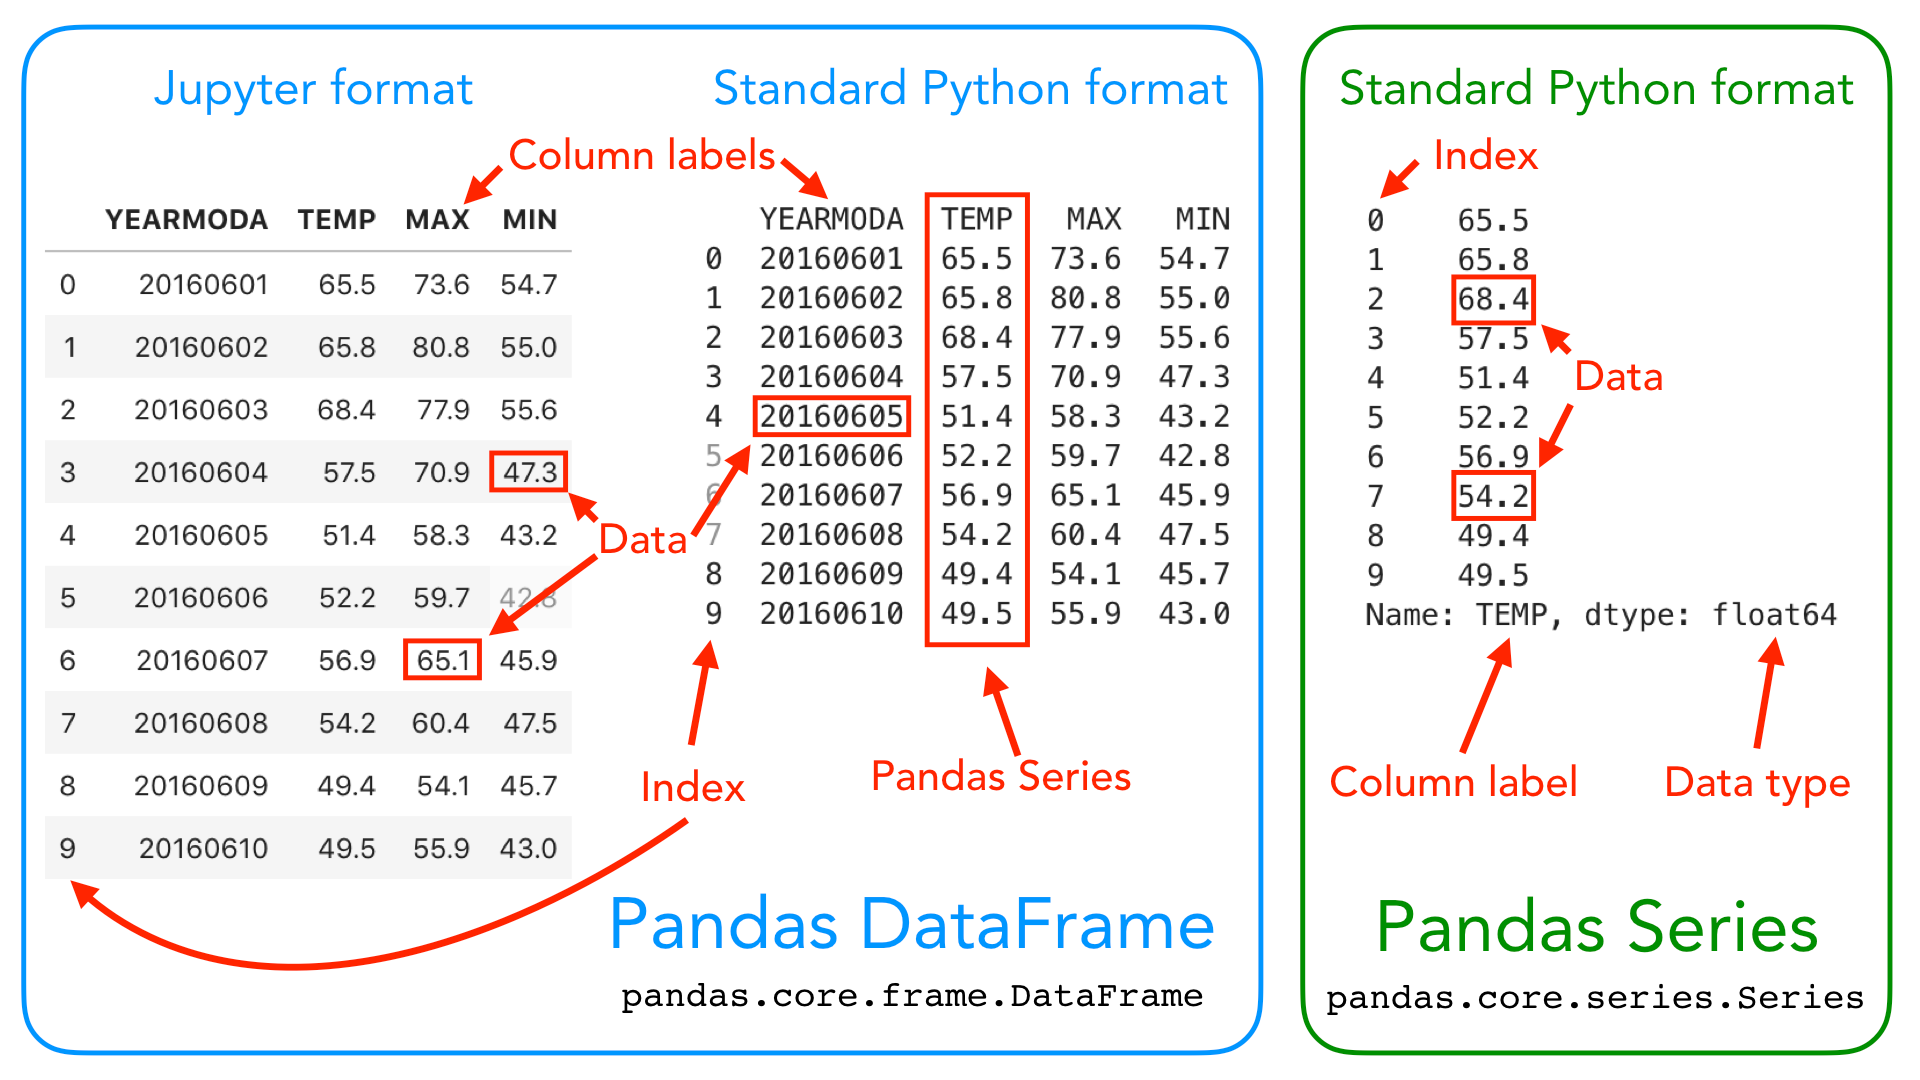

### Reading File

note: data = pd.read_csv(filename, skiprows=8)

### Selecting columns

### Selecting rows and columns

 pandas.DataFrame.loc for Selecting several rows and columns

⚠ Warning

Note that contrary to usual python slices, **both the start and the stop** are included

.loc and .at are based on the axis labels - the names of columns and rows. </br> Axis labels can be also something else than “traditional” index values. </br> For example, datetime is commonly used as the row index.
</br> 
**Selections by integer position**

### Filtering Data

Pandas have many ways of selecting and filtered data from a dataframe. We will now see how to use the Boolean Filtering to filter the dataframe to rows that match a condition.

we have error when use **and** and also **without parantesis**

Notice, that the index values (numbers on the left) are still showing the positions from the original DataFrame. It is possible to reset the index using reset_index() function that might be useful in some cases to be able to slice the data in a similar manner as above. 

By default the reset_index() would make a new column called index to keep track of the previous index which might be useful in some cases but not here, so we can omit that by passing parameter **drop=True**.

### Dealing with missing data

Common procedures to deal with NaN values are to either **remove** them from the DataFrame or **fill** them with some value.

Note that we replaced the original warm_temps variable with version where no data are removed. The .dropna() function, among other pandas functions can also be applied “inplace” which means that the function updates the DataFrame object and returns None:

`df.dropna(subset=['population'], inplace=True)`

### Data type conversions

copybool, default True 
* Return a copy when copy=True (be very careful setting copy=False as changes to values then may propagate to other pandas objects).

### Unique values

### Sorting data

### Copy Filtered dataframe
Filtered dataframe is a just view of the original data and we cannot make changes to it. We can save the filtered view to a new dataframe using the copy() method.


### Performing calculations

In [ ]:
from geopy import distance

def calculate_distance(row):
    other_city_coordinates = (row['lat'], row['lng'])
    return distance.geodesic(other_city_coordinates, city_coordinates).km


### Writing file

In [ ]:
import os
os.mkdir('Output')
output_filename = 'cities_distance_pandas.csv'
output_dir = 'Output'


## Other Data
we are using weather observation data from Finland downloaded from NOAA. You will be working with data from a total of 15 different weather observation stations in Finland.

April 2019 was the second warmest April on record globally, and the warmest on record at 13 weather stations in Finland.

In [ ]:
!wget https://davewhipp.github.io/data/Finland-weather-data-full.tar.gz

### About the data

As part of the download there are a number of files that describe the weather data. These metadata files include:
* A list of stations: 6367598020644stn.txt
* Details about weather observations at each station: 6367598020644inv.txt
* A data description (i.e., column names): 3505doc.txt

### Reading the data


In [ ]:
filename = '/content/data/029440.txt' 
with open(filename, 'r') as f:
    print(f.readline())
    print(f.readline())


In [ ]:
import pandas as pd
data = pd.read_csv(filename, delim_whitespace=True, na_values=["*", "**", "***", "****", "*****", "******"])
data.head()


In [68]:
# Read in only selected columns
data = pd.read_csv(
    filename,
    delim_whitespace=True,
    usecols=["USAF", "YR--MODAHRMN", "DIR", "SPD", "GUS", "TEMP", "MAX", "MIN"],
    na_values=["*", "**", "***", "****", "*****", "******"],
)

# Check the dataframe
data.head()

,USAF,YR--MODAHRMN,DIR,SPD,GUS,TEMP,MAX,MIN
0,29440,190601010600,90.0,7.0,NaN,27.0,NaN,NaN
1,29440,190601011300,NaN,0.0,NaN,27.0,NaN,NaN
2,29440,190601012000,NaN,0.0,NaN,25.0,NaN,NaN
3,29440,190601020600,NaN,0.0,NaN,26.0,NaN,NaN
4,29440,190601021300,270.0,7.0,NaN,27.0,NaN,NaN


### Renaming columns

In [ ]:
# Create the dictionary with old and new names
new_names = {'USAF': 'STATION_NUMBER', "YR--MODAHRMN": "TIME", "SPD": "SPEED", "GUS": "GUST", 'TEMP': 'TEMP_F'}

# Let's see what the variable new_names look like
new_names

### convert temperatures from Fahrenheit to Celsius

In [72]:
def fahr_to_celsius(temp_fahrenheit):
    """
    Function to convert Fahrenheit temperature into Celsius.

    Parameters
    ----------

    temp_fahrenheit: int | float
        Input temperature in Fahrenheit (should be a number)

    Returns
    -------

    Temperature in Celsius (float)
    """

    # Convert the Fahrenheit into Celsius
    converted_temp = (temp_fahrenheit - 32) / 1.8

    return converted_temp

### Iterating over rows

### Parsing dates

We can also combine the datetime functionalities with other methods from pandas. For example, we can check the number of unique years in our input data:

## Aggregating data in pandas by grouping

### 1- Grouping the data based on the year and month

#### Accessing data for one group

Let us now check the contents for the group representing August 2019

2- Calculating the average for each month (each group)

3- Storing those values into a new DataFrame called monthly_data

In [ ]:
monthly_data = pd.DataFrame()

mean_cols = ["DIR", "SPEED", "GUST", "TEMP_F", "TEMP_C"]


We can also achieve the same result by computing the mean of all columns for all groups in the grouped object.

In [98]:
grouped.mean()

<ipython-input-98-eca914d15133>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped.mean()


,STATION_NUMBER,TIME,DIR,SPEED,GUST,TEMP_F,MAX,MIN,TEMP_C,MIN_C,MAX_C
YEAR_MONTH,,,,,,,,,,,
190601,29440.0,1.906012e+11,218.181818,13.204301,NaN,25.526882,NaN,NaN,-3.596177,NaN,NaN
190602,29440.0,1.906021e+11,178.095238,13.142857,NaN,25.797619,NaN,NaN,-3.445767,NaN,NaN
190603,29440.0,1.906032e+11,232.043011,15.021505,NaN,22.806452,NaN,NaN,-5.107527,NaN,NaN
190604,29440.0,1.906042e+11,232.045455,13.811111,NaN,38.822222,NaN,NaN,3.790123,NaN,NaN
190605,29440.0,1.906052e+11,192.820513,10.333333,NaN,55.526882,NaN,NaN,13.070490,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
201906,29440.0,2.019062e+11,370.992008,8.138490,17.251852,61.743400,67.316667,55.600000,16.524111,13.111111,19.620370
201907,29440.0,2.019072e+11,294.433641,5.785714,15.034722,61.569955,67.774194,55.903226,16.427753,13.279570,19.874552
201908,29440.0,2.019082e+11,320.335766,6.769447,15.751678,60.598649,65.935484,55.016129,15.888138,12.786738,18.853047


but if we have many cols then take long time and after that we must delete unnecessery cols

or before using the above code, **select the necessery cols**


#### Detecting warm months

In [99]:


aprils = aprils[["STATION_NUMBER", "TEMP_F", "TEMP_C", "YEAR_MONTH"]]

grouped = aprils.groupby(by="YEAR_MONTH")



,STATION_NUMBER,TEMP_F,TEMP_C
YEAR_MONTH,,,
190604,29440.0,38.822222,3.790123
190704,29440.0,36.111111,2.283951
190804,29440.0,36.811111,2.672840
190904,29440.0,31.977778,-0.012346
191004,29440.0,39.833333,4.351852


Finally, we can sort and check the highest temperature values. We can sort the data frame in a descending order to do this.

In [100]:
monthly_mean.sort_values(by="TEMP_C", ascending=False).head(10)

,STATION_NUMBER,TEMP_F,TEMP_C
YEAR_MONTH,,,
201904,29440.0,42.472030,5.817794
199004,29440.0,41.918084,5.510047
198904,29440.0,41.369647,5.205360
201104,29440.0,41.290730,5.161517
200404,29440.0,41.249676,5.138709
200204,29440.0,41.132353,5.073529
198304,29440.0,41.016183,5.008991
200804,29440.0,40.962343,4.979079
200004,29440.0,40.777778,4.876543


### Repeating the data analysis with a larger dataset

In [ ]:
import glob
file_list = glob.glob(r"data/0*txt")
file_list

In [ ]:
# Repeat the analysis steps for each input file:
for fp in file_list:

    data = pd.read_csv(
        fp,
        delim_whitespace=True,
        usecols=["USAF", "YR--MODAHRMN", "DIR", "SPD", "GUS", "TEMP", "MAX", "MIN"],
        na_values=["*", "**", "***", "****", "*****", "******"],
    )

    new_names = {
        "USAF": "STATION_NUMBER",
        "YR--MODAHRMN": "TIME",
        "SPD": "SPEED",
        "GUS": "GUST",
        "TEMP": "TEMP_F",
    }




    print(f"STATION NUMBER: {data.at[0, 'STATION_NUMBER']}")
    print(f"NUMBER OF OBSERVATIONS: {len(data)}")

    



    data["MONTH"] = data["TIME_STR"].str.slice(start=5, stop=6).astype(int)
    data["YEAR"] = data["TIME_STR"].str.slice(start=0, stop=4).astype(int)

    
    
    
    
    aprils = aprils[["STATION_NUMBER", "TEMP_F", "TEMP_C", "YEAR", "MONTH"]]

    
    
    
    print(monthly_mean.sort_values(by="TEMP_C", ascending=False).head(5))
    print("\n")

# end of lesson05